In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

### Study the difference between size of the model (number of parameters) and initial sampling method
We ran 400 parameter initializations for lhs and uniform, batch (4 parameters) and monod (9 parameters).

In [171]:
lhs_batch_work_dir="../results/batch/lhs/"
filenames=os.listdir(lhs_batch_work_dir)
lhs_lpi_batch=pd.DataFrame()
for i in filenames:
    if len(re.findall("batch_model_loss",i))!=0:
        data=pd.read_csv(lhs_batch_work_dir+i,index_col=0)
        lhs_lpi_batch=pd.concat([lhs_lpi_batch,data],axis=1)


uniform_batch_work_dir="../results/batch/uniform/"
filenames=os.listdir(uniform_batch_work_dir)
uniform_lpi_batch=pd.DataFrame()
for i in filenames:
    if len(re.findall("batch_model_loss",i))!=0:
        data=pd.read_csv(uniform_batch_work_dir+i,index_col=0)
        uniform_lpi_batch=pd.concat([uniform_lpi_batch,data],axis=1)

lhs_monod_work_dir="../results/monod/lhs/"
filenames=os.listdir(lhs_monod_work_dir)
lhs_lpi_monod=pd.DataFrame()
for i in filenames:
    # print(i)
    if len(re.findall("monod_model_loss_per_iteration",i))!=0:
        data=pd.read_csv(lhs_monod_work_dir+i,index_col=0)
        lhs_lpi_monod=pd.concat([lhs_lpi_monod,data],axis=1)



# the names in this directory end with lhs, but are actually uniform. Mistake in naming the output file

uniform_monod_work_dir="../results/monod/uniform/"
filenames=os.listdir(uniform_monod_work_dir)
uniform_lpi_monod=pd.DataFrame()
for i in filenames:
    # print(i)
    if len(re.findall("monod_model_loss_per_iteration",i))!=0:
        data=pd.read_csv(uniform_monod_work_dir+i,index_col=0)
        uniform_lpi_monod=pd.concat([uniform_lpi_monod,data],axis=1)


In [172]:
#lhs batch
n_init_lhs_batch=np.shape(lhs_lpi_batch)[1]
lhs_lpi_batch.columns=np.arange(n_init_lhs_batch)
failed=np.where(lhs_lpi_batch==-1)[1]
failed=[str(i) for i in failed]
exclude=np.setdiff1d(lhs_lpi_batch.columns.to_list(),failed)
lhs_lpi_batch=lhs_lpi_batch.filter(items=list(exclude),axis=1)
lhs_lpi_batch.fillna(0,inplace=True)


#uniform batch
n_init_uniform_batch=np.shape(uniform_lpi_batch)[1]
uniform_lpi_batch.columns=np.arange(n_init_uniform_batch)
failed=np.where(uniform_lpi_batch==-1)[1]
failed=[str(i) for i in failed]
exclude=np.setdiff1d(uniform_lpi_batch.columns.to_list(),failed)
uniform_lpi_batch=uniform_lpi_batch.filter(items=list(exclude),axis=1)
uniform_lpi_batch.fillna(0,inplace=True)

#lhs monod
n_init_lhs_monod=np.shape(lhs_lpi_monod)[1]
lhs_lpi_monod.columns=np.arange(n_init_lhs_monod)
failed=np.where(lhs_lpi_monod==-1)[1]
failed=[str(i) for i in failed]
exclude=np.setdiff1d(lhs_lpi_monod.columns.to_list(),failed)
lhs_lpi_monod=lhs_lpi_monod.filter(items=list(exclude),axis=1)
lhs_lpi_monod.fillna(0,inplace=True)
#uniform monod
n_init_uniform_monod=np.shape(uniform_lpi_monod)[1]
uniform_lpi_monod.columns=np.arange(n_init_uniform_monod)
failed=np.where(uniform_lpi_monod==-1)[1]
failed=[str(i) for i in failed]
exclude=np.setdiff1d(uniform_lpi_monod.columns.to_list(),failed)
uniform_lpi_monod=uniform_lpi_monod.filter(items=list(exclude),axis=1)
uniform_lpi_monod.fillna(0,inplace=True)



In [173]:
N_iter=np.shape(uniform_lpi_monod)[0]




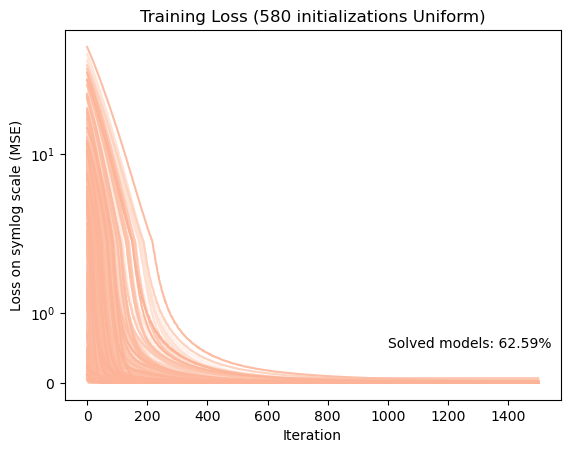

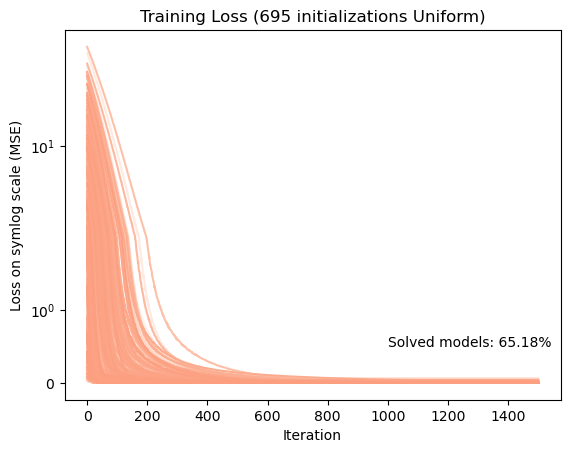

In [174]:
fig,ax=plt.subplots()

for i in range(np.shape(uniform_lpi_monod)[1]):
    ax.plot(uniform_lpi_monod.iloc[:,i], color=plt.cm.Reds(i / np.shape(uniform_lpi_monod)[0]))

succeeded=np.sum(uniform_lpi_monod.iloc[N_iter-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_init_uniform_monod*100,2)
# solved_models=np.round(np.sum(uniform_lpi_monod[len(uniform_lpi_monod)]==0)/np.shape(uniform_lpi_monod)[1]*100,2)

# final_iteration=uniform_lpi_monod.iloc[:,np.shape(uniform_lpi_monod)[0]-1]
# percentage_of_models=np.sum(final_iteration==0)/n_init_uniform_monod*100
annotation="Solved models: "+str(succeeded)+ "%"
plt.yscale("symlog")
plt.title("Training Loss ("+ str(n_init_uniform_monod)+" initializations Uniform)")
plt.xlabel("Iteration")
plt.ylabel("Loss on symlog scale (MSE)")
plt.annotate(annotation,xy=(1000,0.5))
plt.show()


fig,ax=plt.subplots()

for i in range(np.shape(lhs_lpi_monod)[1]):
    ax.plot(lhs_lpi_monod.iloc[:,i], color=plt.cm.Reds(i / np.shape(lhs_lpi_monod)[0]))

succeeded=np.sum(lhs_lpi_monod.iloc[N_iter-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_init_lhs_monod*100,2)
# solved_models=np.round(np.sum(uniform_lpi_monod[len(uniform_lpi_monod)]==0)/np.shape(uniform_lpi_monod)[1]*100,2)

# final_iteration=uniform_lpi_monod.iloc[:,np.shape(uniform_lpi_monod)[0]-1]
# percentage_of_models=np.sum(final_iteration==0)/n_init_uniform_monod*100
annotation="Solved models: "+str(succeeded)+ "%"
plt.yscale("symlog")
plt.title("Training Loss ("+ str(n_init_lhs_monod)+" initializations Uniform)")
plt.xlabel("Iteration")
plt.ylabel("Loss on symlog scale (MSE)")
plt.annotate(annotation,xy=(1000,0.5))
plt.show()

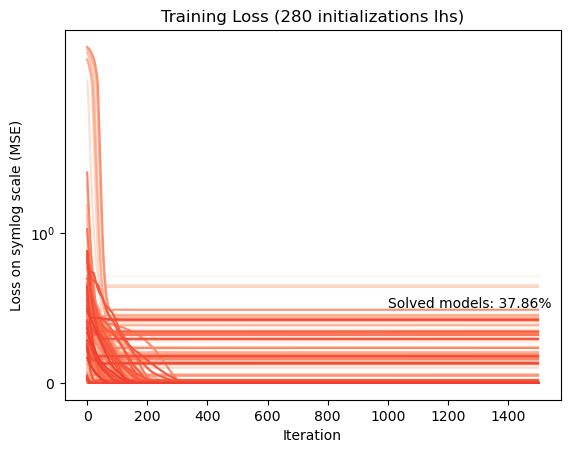

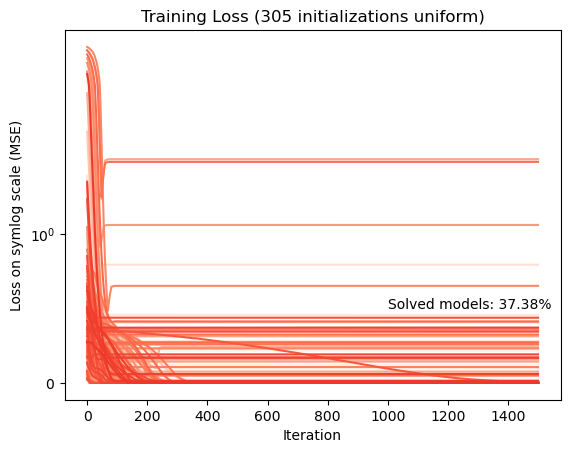

In [175]:
fig,ax=plt.subplots()

for i in range(np.shape(lhs_lpi_batch)[1]):
    ax.plot(lhs_lpi_batch.iloc[:,i], color=plt.cm.Reds(i))#/ np.shape(lhs_lpi_batch)[0]))

succeeded=np.sum(lhs_lpi_batch.iloc[N_iter-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_init_lhs_batch*100,2)
# solved_models=np.round(np.sum(uniform_lpi_monod[len(uniform_lpi_monod)]==0)/np.shape(uniform_lpi_monod)[1]*100,2)

# final_iteration=uniform_lpi_monod.iloc[:,np.shape(uniform_lpi_monod)[0]-1]
# percentage_of_models=np.sum(final_iteration==0)/n_init_uniform_monod*100
annotation="Solved models: "+str(succeeded)+ "%"
plt.yscale("symlog")
plt.title("Training Loss ("+ str(n_init_lhs_batch)+" initializations lhs)")
plt.xlabel("Iteration")
plt.ylabel("Loss on symlog scale (MSE)")
plt.annotate(annotation,xy=(1000,0.5))
plt.show()



fig,ax=plt.subplots()
for i in range(np.shape(uniform_lpi_batch)[1]):
    ax.plot(uniform_lpi_batch.iloc[:,i], color=plt.cm.Reds(i))#/ np.shape(lhs_lpi_batch)[0]))

succeeded=np.sum(uniform_lpi_batch.iloc[N_iter-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_init_uniform_batch*100,2)
# solved_models=np.round(np.sum(uniform_lpi_monod[len(uniform_lpi_monod)]==0)/np.shape(uniform_lpi_monod)[1]*100,2)

# final_iteration=uniform_lpi_monod.iloc[:,np.shape(uniform_lpi_monod)[0]-1]
# percentage_of_models=np.sum(final_iteration==0)/n_init_uniform_monod*100
annotation="Solved models: "+str(succeeded)+ "%"
plt.yscale("symlog")
plt.title("Training Loss ("+ str(n_init_uniform_batch)+" initializations uniform)")
plt.xlabel("Iteration")
plt.ylabel("Loss on symlog scale (MSE)")
plt.annotate(annotation,xy=(1000,0.5))
plt.show()

In [180]:

lhs_monod_dir="../results/monod/lhs/"
filenames=os.listdir(lhs_monod_work_dir)
lhs_opt_monod_params=pd.DataFrame()
for i in filenames:
    # print(i)
    if len(re.findall("monod_model_optimized_parameters",i))!=0:
        data=pd.read_csv(lhs_opt_monod_params+i,index_col=0)
        lhs_opt_params=pd.concat([lhs_opt_params,data],axis=1)
lhs_opt_params

,0,1,2,3,0,1,2,3,4,0,...,0,1,2,3,4,0,1,2,3,4
p_vmax_L,0.168305,0.272400,0.133605,0.096579,0.277862,0.115972,0.199540,0.131882,0.134455,0.125002,...,0.123616,0.095900,0.119247,0.073479,0.229091,0.111239,0.261441,0.165685,0.244327,0.132035
p_vmax_P,9.939915,11.420763,10.314865,11.918961,10.398191,9.756251,9.601752,11.184007,8.987962,9.031616,...,11.479317,11.489976,8.450429,10.429527,8.109767,10.851558,10.140923,11.032779,8.590879,10.611763
p_vmax_A,0.556663,0.468655,0.607832,0.544996,0.434478,0.521646,0.691891,0.589748,0.567302,0.532311,...,0.585592,0.572042,0.598414,0.576400,0.476951,0.515338,0.453203,0.470908,0.476080,0.550386
p_Ks_L,22.697378,18.924140,22.621010,15.234395,16.040094,16.074380,18.136189,21.256330,20.390764,17.966700,...,20.156270,16.279095,22.232273,16.711042,17.435982,15.037483,17.784353,14.915369,21.751720,18.506712
p_Ks_P,0.282818,0.235699,0.209111,0.023949,0.214558,0.116598,0.130171,0.216267,0.172978,0.160443,...,0.092626,0.054651,0.167555,0.086014,0.185028,0.097469,0.211768,0.278177,0.341642,0.155448
p_Ks_A,21.540098,18.753208,21.938189,15.764800,18.778797,22.465548,17.400145,21.493494,21.993916,17.674952,...,17.737103,17.227365,18.156360,20.967611,15.637453,17.193604,15.277117,23.516039,14.983482,19.487585
p_kf_AL,0.955024,0.915778,0.635512,0.578700,0.743734,0.757382,0.553668,0.619499,0.669396,0.715789,...,0.685228,0.473693,0.621593,0.495810,0.883514,0.735600,0.639566,0.954537,0.852773,0.739484
p_kf_PL,1.022020,0.863785,0.928877,0.851199,1.091976,1.018219,0.993128,0.984415,1.134109,1.228586,...,0.855986,0.713583,1.067889,0.767958,0.828530,0.944078,1.076977,1.100892,0.922957,0.823715
p_kf_AP,0.540439,0.476716,0.406686,0.369250,0.422165,0.452007,0.444783,0.471042,0.520698,0.544528,...,0.384468,0.348566,0.490603,0.336000,0.621079,0.429060,0.443855,0.595413,0.581251,0.448925
